# Lecture 17: Iterations and Vectorization
In this lecture we'll learn about:
- [Iteration](#Iteration): `for`/`while` loops.
- [Functional programming](#Functional-programming) (FP): functions that operate on other functions.



In [64]:
library(tidyverse)
install.packages('nycflights13')
library(nycflights13)

remotes::install_github("bradleyboehmke/harrypotter")
install.packages("tidytext")
library(harrypotter)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Iteration
Iteration means, roughly, "running the same piece of code repeatedly". There are many ways to perform iteration in R. The one you have probably heard of is the *for loop*:
```{r}
for (<index> in <vector>) {
    [do something for each value of <index>]
}
```

In [ ]:
for (i in 1:10) {
   cat(i, '\n')
}

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 


Note that the loop and the iterator are evaluated within the global environment.



In [15]:
for (var in names(mtcars) ) {
  cat(sprintf('average %s = %4.3f', var, mean(mtcars[, var]) ), '\n')
}

average mpg = 20.091 
average cyl = 6.188 
average disp = 230.722 
average hp = 146.688 
average drat = 3.597 
average wt = 3.217 
average qsec = 17.849 
average vs = 0.438 
average am = 0.406 
average gear = 3.688 
average carb = 2.812 


#### while

A while statement can be useful when you aren’t sure how many iterations are needed. 

Here is an example that takes a random walk and terminates if the value is more than 10 units from 0.

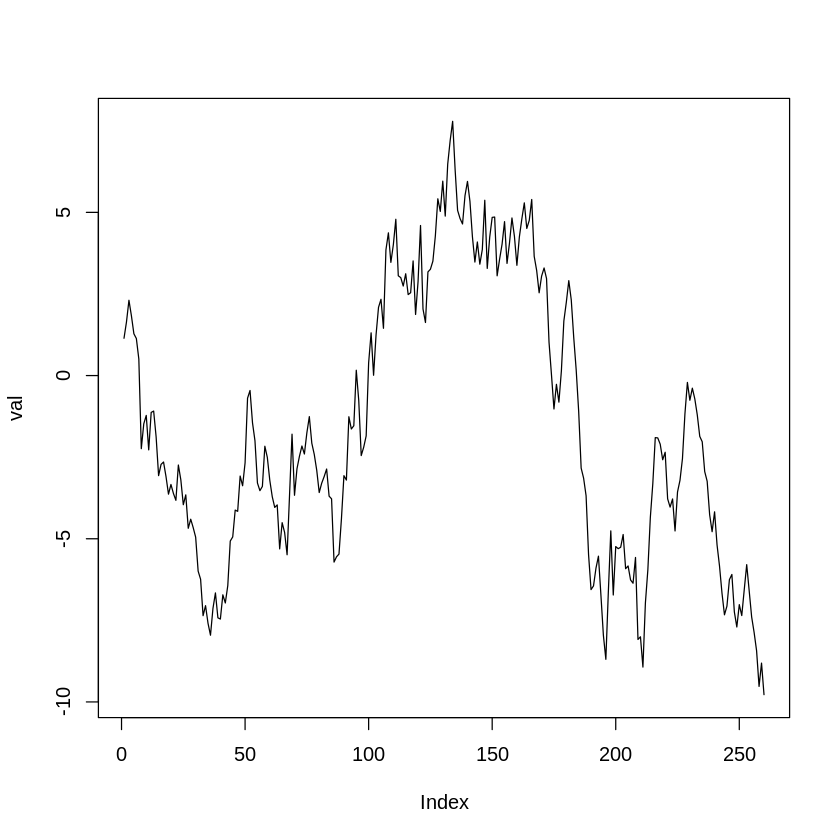

In [34]:
maxIter = 1e3 # always limit the total iterations allowed
val = vector(mode = 'numeric', length = maxIter)
val[1] = rnorm(1) ## initialize

k = 1
while (abs(val[k]) < 10 && k <= maxIter) {
  val[k + 1] = val[k] + rnorm(1)
  k = k + 1
}
val = val[1:k-1]

plot(val, type = 'l')

#### key words
The following key words are useful within loops:

- break - break out of the currently executing loop
- next - move to the next iteration immediately, without executing the rest of this iteration (continue in other languages such as C++)

Here is an example using next:



In [ ]:
for ( i in 1:10 ) {
  if (i %% 2 == 0) next
  cat(i,'\n')
}

1 
3 
5 
7 
9 


## Conditional execution

Often when writing functions we need to do different things depending on what data is passed in. This is known as conditional execution, and is accomplished using the if and/or else construct:

```
if (condition) {
  # code executed when condition is TRUE
} else {
  # code executed when condition is FALSE
}
```



#### if statements

The workhorse for conditional execution in `R` is the if statement.
In the syntax below, note the spacing around the condition enclosed in the parentheses.

In [21]:
if ( TRUE ) {  # this condition is hard-coded to TRUE and will also execute the if-block
  print('do something if true')
}

[1] "do something if true"


## Optional `else` block

Use an else to control the flow without separately checking the condition’s negation:



In [35]:
if ((2 + 2) == 5 ) {
  print('the statement is true')
} else {
  print('the statement is false')
}

[1] "the statement is false"


### `ifelse` function

ifelse() is a function that takes three vector arguments and returns a new vector. As you can see this is not the same as above

In [32]:
# Define a vector
x <- c(1, 2, 3, 4, 5)

# Use ifelse to create a new vector
y <- ifelse(x > 3, "large", "small")

y

[1] "small" "small" "small" "large" "large"

# What about if_else?

`if_else` comes from dplyr and works the same as ifelse except the output from the if_else should be of the same type

In [39]:
y <- if_else(x > 3, "large", 10)
y

ERROR: ignored

### if-else chain

For more complex cases, you may want to check multiple conditions:

In [ ]:
a = -1
b = 1

if (a * b > 0) {
  print('Zero is not between a and b')
} else if ( a < b ) {
    smaller = a
    larger = b
} else {
    smaller = b
    larger  = a
}

c(smaller, larger)

[1] -1  1

### Exercise

Write a function fizzbuzz(x) that prints "fizz" if x is less than three, and "buzz" otherwise.


### Quiz🤔 


1. Read the R code below and determine the value of twos and threes at the end.

* A: 30, 20
* b: 30, 12
* c: 20, 30
* d: 2, 3

In [45]:
twos = 0
threes = 0
for ( i in 1:10 ) {
  if ( i %% 2 == 0 ) {
    twos = twos + i
  } else if ( i %% 3 == 0 ) {
    threes = threes + i 
  }
}


## Vectorization

Vectorization is a programming concept in which loops are encapsulated within function calls in order to improve the readability of program code.  In high-level interpreted languages such as R, this also is a means of improving efficiency by making use of loops implemented in lower level source code (e.g. C). While loops (`for`, `while`, `apply()`, etc.) have their place in well-written R code,  it is often the case that inefficient or bloated R code can be improved through vectorization.

Vectorization is a programming technique used to avoid explicit loops in order to improve the performance and readability of code.

In its simplest form, vectorization means using built in vectorized functions. That is, rather than looping over a vector to compute its sum, we instead use the vectorized function `sum()`.

In [58]:
## Not vectorized
x = 0:5
y = 5:10
result1 <- vector(mode = "numeric", length = length(x))

# element-wise addition
for (i in 1:length(x) ) {
  result1[i] = x[i] + y[i]
}

## Vectorized
result2 = x + y

## Do we get the same sum?
result1 == result2
cat(result1,"\n",result2)



[1] TRUE TRUE TRUE TRUE TRUE TRUE

5 7 9 11 13 15 
 5 7 9 11 13 15

The vectorized code is not only easier to type and read but is also faster.



##Testing for equality

Be careful when testing for equality in conditionals. The == operator will return a vector of logicals. If you want to make sure that any/all entries of a vector are TRUE, use the any() or all() functions:

In [59]:
v1 = c(1, 2, 3)
v2 = c(1, 1, 2)
v1 == v2
all(v1 == v2)
any(v1 == v2)

[1]  TRUE FALSE FALSE

[1] FALSE

[1] TRUE

# `across`

Let us say you want to group by manufacturer and model in `mpg` dataset then you could use the below expression

In [63]:
# Select columns that have a column name starting with "a"
mpg %>%
  group_by(across(starts_with("m"))) %>% 
  summarise(hwy_mean = mean(hwy)) %>%
    print

`summarise()` has grouped output by 'manufacturer'. You can override using the
`.groups` argument.


# A tibble: 38 × 3
# Groups:   manufacturer [15]
   manufacturer model              hwy_mean
   <chr>        <chr>                 <dbl>
 1 audi         a4                     28.3
 2 audi         a4 quattro             25.8
 3 audi         a6 quattro             24  
 4 chevrolet    c1500 suburban 2wd     17.8
 5 chevrolet    corvette               24.8
 6 chevrolet    k1500 tahoe 4wd        16.2
 7 chevrolet    malibu                 27.6
 8 dodge        caravan 2wd            22.4
 9 dodge        dakota pickup 4wd      17  
10 dodge        durango 4wd            16  
# … with 28 more rows


`across` is a powerful function in the dplyr package in R that allows you to perform the same operation on multiple columns of a data frame at once. 

### Exercise

Compute the mean departure delay and arrival delay for each airline in the flights dataset:

In [76]:
delays_by_airline <- flights %>% 
  group_by(carrier) %>% 
  summarize(across(c(arr_delay, dep_delay), mean, na.rm = TRUE)) %>% arrange(arr_delay, dep_delay) %>% print


# A tibble: 16 × 3
   carrier arr_delay dep_delay
   <chr>       <dbl>     <dbl>
 1 AS         -9.93       5.80
 2 HA         -6.92       4.90
 3 AA          0.364      8.59
 4 DL          1.64       9.26
 5 VX          1.76      12.9 
 6 US          2.13       3.78
 7 UA          3.56      12.1 
 8 9E          7.38      16.7 
 9 B6          9.46      13.0 
10 WN          9.65      17.7 
11 MQ         10.8       10.6 
12 OO         11.9       12.6 
13 YV         15.6       19.0 
14 EV         15.8       20.0 
15 FL         20.1       18.7 
16 F9         21.9       20.2 


### `bind_rows`

To combine multiple dataframe into one large dataframe, you cna use `bind_rows`.
Recollect you encountered the need for this in hw7 although you could have solved the problems without knowing about this, it would have been easier if you knew this!



In [81]:
phil_tbl <- tibble(chapter=seq_along(philosophers_stone), text=philosophers_stone)
chamber_tbl <- tibble(chapter=seq_along(chamber_of_secrets), text=chamber_of_secrets)
prisoner_tbl <- tibble(chapter=seq_along(prisoner_of_azkaban), text=prisoner_of_azkaban)
goblet_tbl <- tibble(chapter=seq_along(goblet_of_fire), text=goblet_of_fire)
order_of_tbl <- tibble(chapter=seq_along(order_of_the_phoenix), text=order_of_the_phoenix)
half_blood_tbl <- tibble(chapter=seq_along(half_blood_prince), text=half_blood_prince)
deathly_tbl <- tibble(chapter=seq_along(deathly_hallows), text=deathly_hallows)

combined <- bind_rows(phil_tbl, chamber_tbl, prisoner_tbl, goblet_tbl, order_of_tbl, half_blood_tbl, deathly_tbl)

In [82]:
combined %>% glimpse

Rows: 200
Columns: 2
$ chapter <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, …
$ text    <chr> "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Pr…


If the data frames have different column names or types, bind_rows will try to match them based on their column names, and it will coerce the columns to a common type if necessary.

### `purr::map` function

When you want to apply a function to individual elements of a list, a good option to consider is `map`


In [88]:
my_list <- list(1:5, 6:10, 11:15)

print(my_list)

# Add 2 to each element in the list using map()
my_list_plus_two <- map(my_list, ~ .x + 2)

# Print the result
my_list_plus_two

[[1]]
[1] 1 2 3 4 5

[[2]]
[1]  6  7  8  9 10

[[3]]
[1] 11 12 13 14 15



[[1]]
[1] 3 4 5 6 7

[[2]]
[1]  8  9 10 11 12

[[3]]
[1] 13 14 15 16 17

### Using `map_dfr` 

While map is applied to a list or vector, `map_dfr` can be used to apply functions on dataframe.



In [93]:
books = c(
    "philosophers_stone",
    "chamber_of_secrets", 
    "prisoner_of_azkaban",
    "goblet_of_fire", 
    "half_blood_prince",
    "order_of_the_phoenix",
    "deathly_hallows"
)

combined <- map_dfr(books, ~ tibble(book=., chapter=seq_along(get(.)), text=get(.))) %>%
  glimpse

Rows: 200
Columns: 3
$ book    <chr> "philosophers_stone", "philosophers_stone", "philosophers_ston…
$ chapter <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, …
$ text    <chr> "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Pr…


Now it is good idea to re-factor your HW7 to use all of these new functions!

## What is refactoring?

In software it is customary to first get 'a' solution for a problem.  Once you have a working software, you should always think through and see if there are opportunities to make things better. That step is called refactoring!
Invariably everytime you relook at your code, you will find opportunities to make things better. Some of the things that stand out are
* Code that is repeating - pull them over to a function
* Renaming your variables to make it more meaningful so that a third person who looks at your code can understand what you are trying to do (sometimes it helps you to recollect what you were doing, when you revisit your code after a few months)
* See if there are other builtin functions that you replace your code with 

These are only some tips, to get your started in refactoring path. However, attempting to write the best code possible to begin with itself could take you in an analysis-paralysis mode. So the first step always is to get it working in some form and then think of refactoring. However, as you gain experience, you will apply the correct methods itself in your first attempt.
But in anycase writing code itself is a iterating process